In [2]:
import pandas as pd


df_carwale = pd.read_csv("ev_reviews/4-wheeler-EV-carwale.csv")
df_cardekho = pd.read_csv("ev_reviews/4-wheeler-EV-cardekho.csv")


df_carwale = df_carwale.rename(columns={"review": "Review", "model_name": "Model"})
df_cardekho = df_cardekho.rename(columns={"Review": "Review", "Model": "Model"})


df_reviews = pd.concat([df_carwale[['Review', 'Model']], df_cardekho[['Review', 'Model']]], ignore_index=True)
df_reviews.dropna(inplace=True)


df_market = pd.read_csv("global_ev/Global EV 2023.csv")


df_iea = pd.read_csv("iea_ev_data.csv")


print("Reviews:")
print(df_reviews.head())

print("\n Global Market Data:")
print(df_market.head())

print("\n IEA Data:")
print(df_iea.head())


Reviews:
                                              Review         Model
0  Superb car like as fantastic as petroleum car....  hyundai kona
1  Anti national, worst service, worst customer c...  hyundai kona
2           Super happy with it. The car is too good  hyundai kona
3  Pretty good car, smooth as a glider fast car, ...  hyundai kona
4  Price difference between petrol and electronic...  hyundai kona

 Global Market Data:
      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical  EV stock share  Cars         EV  2011   percent   
3  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV sales  Cars        BEV  2012  Vehicles   

       value  
0   49.00000  
1    0.00650  
2    0.00046  
3   49.00000  
4  170.00000  

 IEA Data:
  

In [3]:

print(" Dataset Summary:")
df_reviews.info()


print("\n Missing values:")
print(df_reviews.isnull().sum())


df_reviews['Review Length'] = df_reviews['Review'].str.len()
print("\n Review Length Stats:")
print(df_reviews['Review Length'].describe())


print("\n Reviews per EV model:")
print(df_reviews['Model'].value_counts())




 Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  269 non-null    object
 1   Model   269 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB

 Missing values:
Review    0
Model     0
dtype: int64

 Review Length Stats:
count     269.000000
mean      254.293680
std       179.011921
min        40.000000
25%       146.000000
50%       200.000000
75%       343.000000
max      1861.000000
Name: Review Length, dtype: float64

 Reviews per EV model:
Model
tata nexon ev    75
Tata Nexon EV    74
hyundai kona     56
tata tigor ev    20
Tata Tigor EV    15
Kia EV6          12
MG ZS EV         12
BYD E6            5
Name: count, dtype: int64


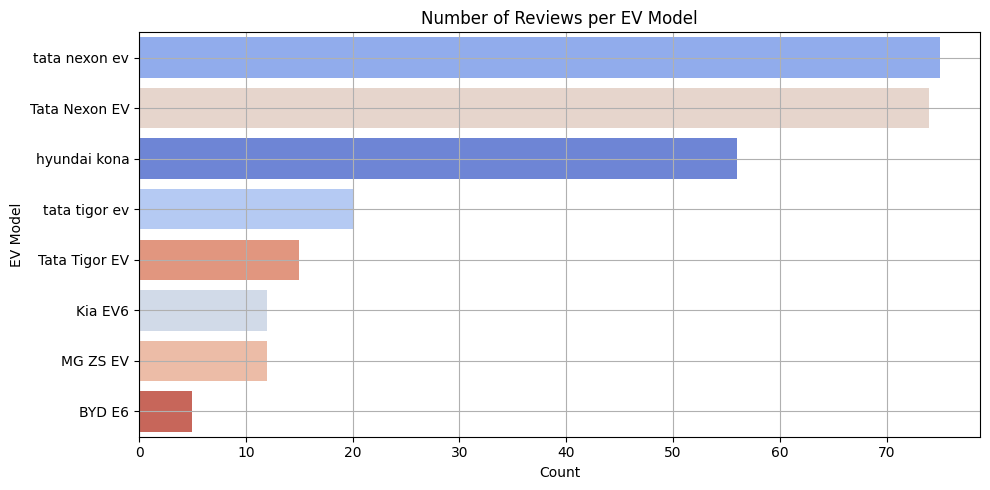

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(y='Model', data=df_reviews, order=df_reviews['Model'].value_counts().index, hue='Model', palette="coolwarm", legend=False)
plt.title("Number of Reviews per EV Model")
plt.xlabel("Count")
plt.ylabel("EV Model")
plt.grid(True)
plt.tight_layout()
plt.show()


 Regions in dataset: 38
 Powertrain types: ['BEV' 'EV' 'PHEV' 'Publicly available fast' 'Publicly available slow']

 Data range: 2010 to 2030


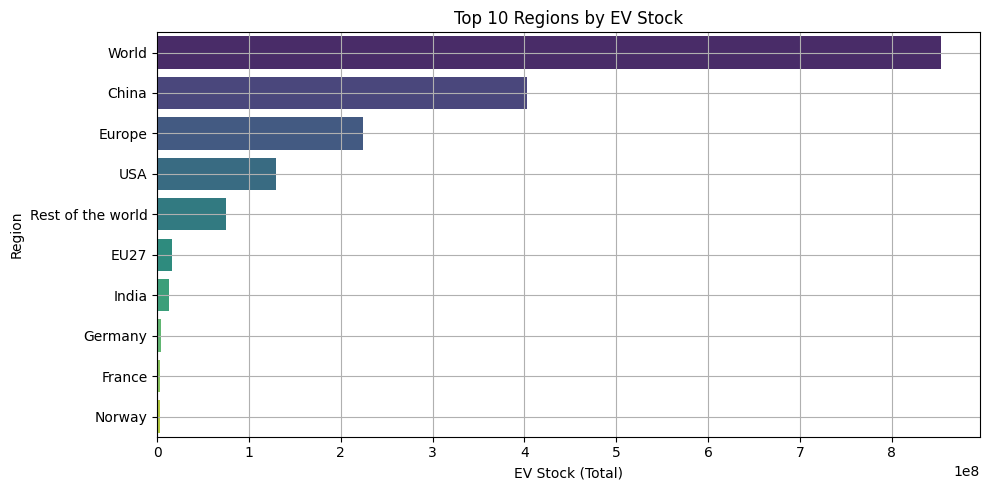

In [5]:

print("\n Regions in dataset:", df_market['region'].nunique())
print(" Powertrain types:", df_market['powertrain'].unique())


print("\n Data range:", df_market['year'].min(), "to", df_market['year'].max())


stock = df_market[(df_market['parameter'] == 'EV stock') & (df_market['unit'] == 'Vehicles')]
top_regions = stock.groupby('region')['value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_regions.values, y=top_regions.index, hue=top_regions.index, palette='viridis')
plt.title("Top 10 Regions by EV Stock")
plt.xlabel("EV Stock (Total)")
plt.ylabel("Region")
plt.grid(True)
plt.tight_layout()
plt.show()



 IEA dataset coverage:
Regions: 61
Parameters: ['EV sales' 'EV stock' 'EV sales share' 'EV stock share'
 'Oil displacement Mbd' 'Oil displacement, million lge' 'Battery demand']
Years: 2010 - 2024


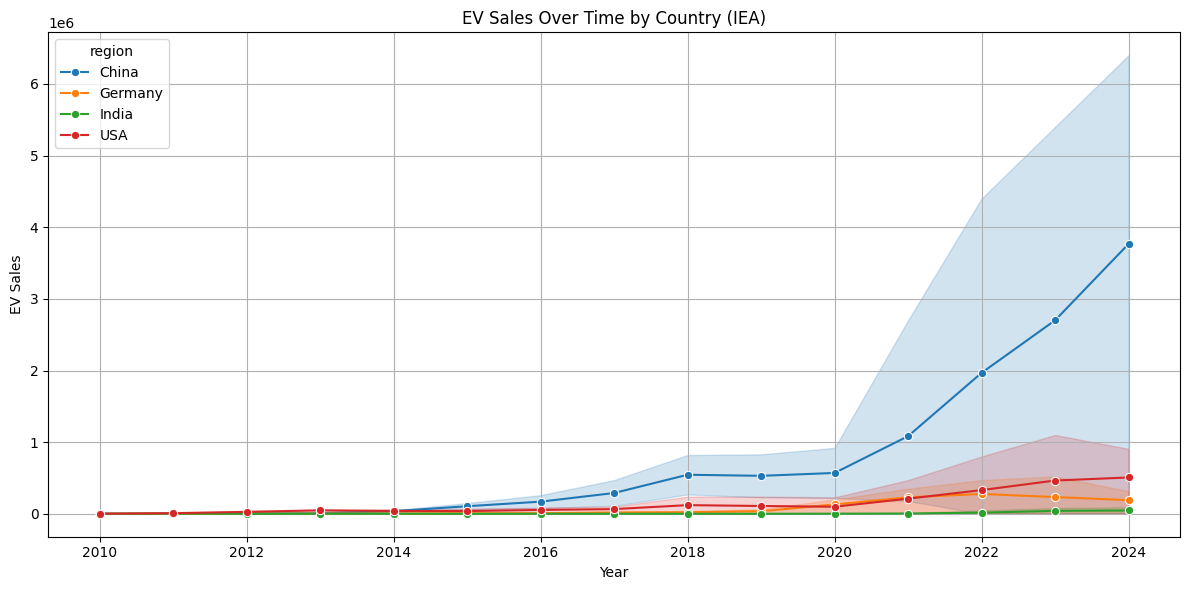

In [6]:

print("\n IEA dataset coverage:")
print("Regions:", df_iea['region'].nunique())
print("Parameters:", df_iea['parameter'].unique())
print("Years:", df_iea['year'].min(), "-", df_iea['year'].max())


selected_countries = ['USA', 'China', 'India', 'Germany']
iea_ev_sales = df_iea[(df_iea['parameter'] == 'EV sales') & (df_iea['region'].isin(selected_countries))]

plt.figure(figsize=(12, 6))
sns.lineplot(data=iea_ev_sales, x='year', y='value', hue='region', marker='o')
plt.title("EV Sales Over Time by Country (IEA)")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc 
        if token.is_alpha and not token.is_stop
    ]
    return tokens


custom_stop_words = {"car", "vehicle", "drive", "driving", "model", "engine", 'tata', 'electric', 'ev',
                      'nexon', }
for word in custom_stop_words:
    nlp.vocab[word].is_stop = True

df_reviews["tokens"] = df_reviews["Review"].apply(preprocess)


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_reviews["Model_Label"] = le.fit_transform(df_reviews["Model"])
df_reviews.head()

,Review,Model,Review Length,tokens,Model_Label
0,Superb car like as fantastic as petroleum car....,hyundai kona,209,"[superb, like, fantastic, petroleum, speed, su...",5
1,"Anti national, worst service, worst customer c...",hyundai kona,183,"[anti, national, bad, service, bad, customer, ...",5
2,Super happy with it. The car is too good,hyundai kona,40,"[super, happy, good]",5
3,"Pretty good car, smooth as a glider fast car, ...",hyundai kona,202,"[pretty, good, smooth, glider, fast, instant, ...",5
4,Price difference between petrol and electronic...,hyundai kona,323,"[price, difference, petrol, electronic, convin...",5


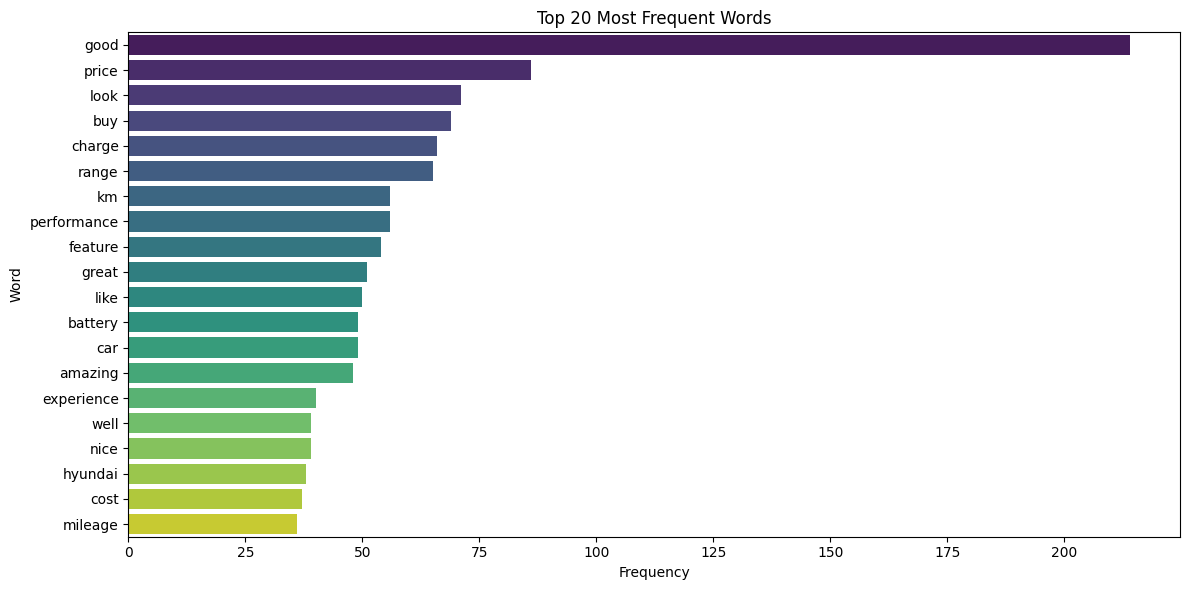

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

df_reviews["cleaned_review"] = df_reviews["tokens"].apply(lambda tokens: " ".join(tokens))
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_reviews["cleaned_review"])
y = df_reviews["Model_Label"]

word_counts = X.toarray().sum(axis=0)
vocab = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({
    "word": vocab,
    "frequency": word_counts,
}).sort_values(by="frequency", ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x="frequency", y="word", data=word_freq_df, hue='word', palette="viridis")
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

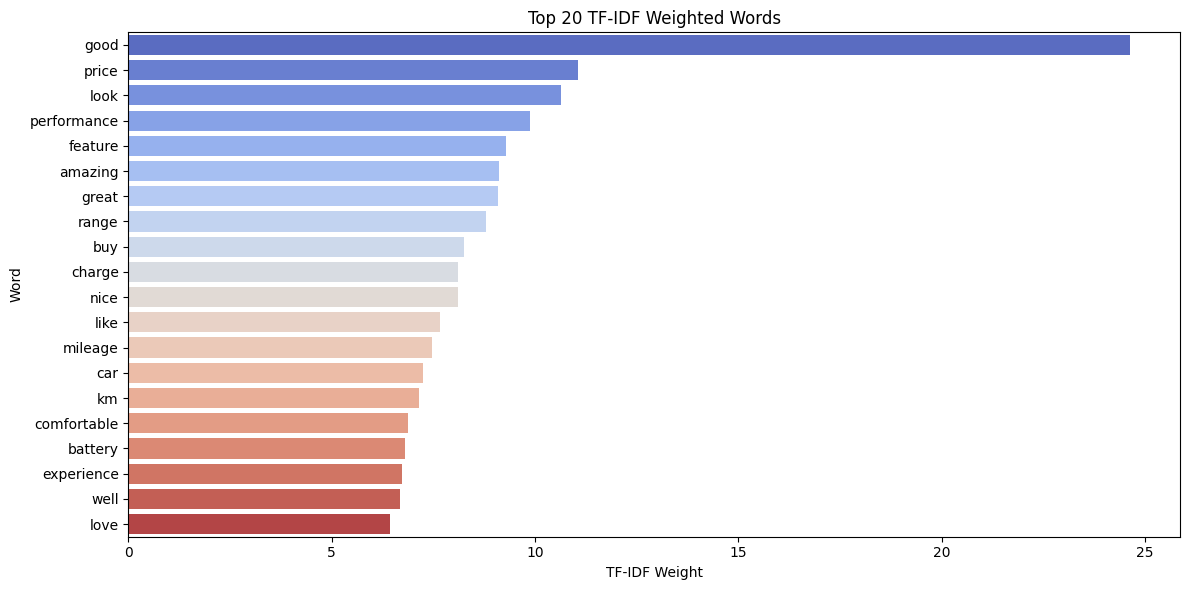

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df_reviews["cleaned_review"])

# Vocabulary & weights
vocab = tfidf.get_feature_names_out()
weights = X_tfidf.toarray().sum(axis=0) 

# Plot top TF-IDF features
tfidf_df = pd.DataFrame({
    "word": vocab,
    "weight": weights
}).sort_values(by="weight", ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x="weight", y="word", data=tfidf_df, hue='word', palette="coolwarm")
plt.title("Top 20 TF-IDF Weighted Words")
plt.xlabel("TF-IDF Weight")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

In [11]:
def extract_sentences(text):
    return [sent.text.strip() for sent in nlp(text).sents]

# Apply sentence segmentation to all reviews
df_reviews["sentences"] = df_reviews["cleaned_review"].apply(extract_sentences)

# Flatten into a DataFrame: one sentence per row
sent_rows = []
for idx, row in df_reviews.iterrows():
    for sent in row["sentences"]:
        sent_rows.append({"sentence": sent, "model": row["Model"]})
sent_df = pd.DataFrame(sent_rows)
top_words = tfidf_df.head(20)["word"].tolist()
examples = []
for word in top_words:
    matched = sent_df[sent_df["sentence"].str.contains(rf"\b{word}\b", case=False, regex=True)]
    if not matched.empty:
        sentence = matched.iloc[0]["sentence"]
        model = matched.iloc[0]["model"]
        examples.append((word, sentence, model))
example_df = pd.DataFrame(examples, columns=["word", "Context", "model"])
print(example_df)

           word                                            Context  \
0          good                                   super happy good   
1         price  anti national bad service bad customer bad dea...   
2          look  superb like fantastic petroleum speed superb b...   
3   performance  short legroom rear performance wish completely...   
4       feature  m observe month finally launch talk local deal...   
5       amazing  superb like fantastic petroleum speed superb b...   
6         great  great purchase hindustan hyundai jaipur happy ...   
7         range  pretty good smooth glider fast instant pickup ...   
8           buy  superb like fantastic petroleum speed superb b...   
9        charge  pretty good smooth glider fast instant pickup ...   
10         nice  india exelent speedy car maintance performance...   
11         like  superb like fantastic petroleum speed superb b...   
12      mileage  anti national bad service bad customer bad dea...   
13          car  ok 

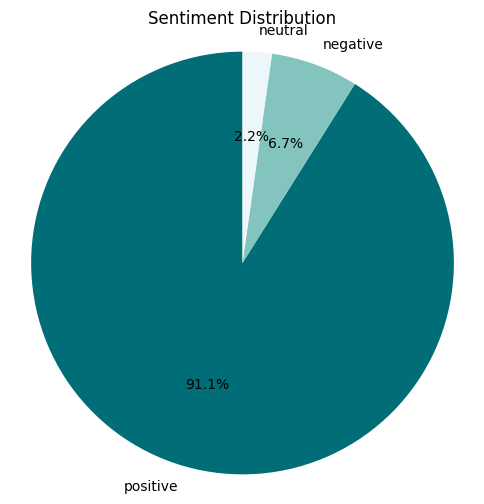

In [ ]:
positive_keywords = [
    "love", "great", "excellent", "amazing", "smooth", "fast", "efficient", "comfortable",
    "quiet", "perfect", "reliable", "awesome", "best", "impressive", "enjoy"
]

negative_keywords = [
    "hate", "bad", "terrible", "worst", "slow", "loud", "uncomfortable", "broken",
    "problem", "issue", "disappointing", "expensive", "poor", "waste", "slow"
]

from afinn import Afinn

afn = Afinn()
scores = [afn.score(review) for review in df_reviews['Review']]
sentiments = ['positive' if score > 0 
                else 'negative' if score < 0 
                    else 'neutral' 
                        for score in scores]

df_scores = pd.DataFrame()
df_scores['Review'] =  df_reviews['Review']
df_scores['Score'] = scores
df_scores['Sentiment'] = sentiments
df_scores

counts = df_scores["Sentiment"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts, 
    labels=counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=["#006d77", "#83c5be", "#edf6f9"]
)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


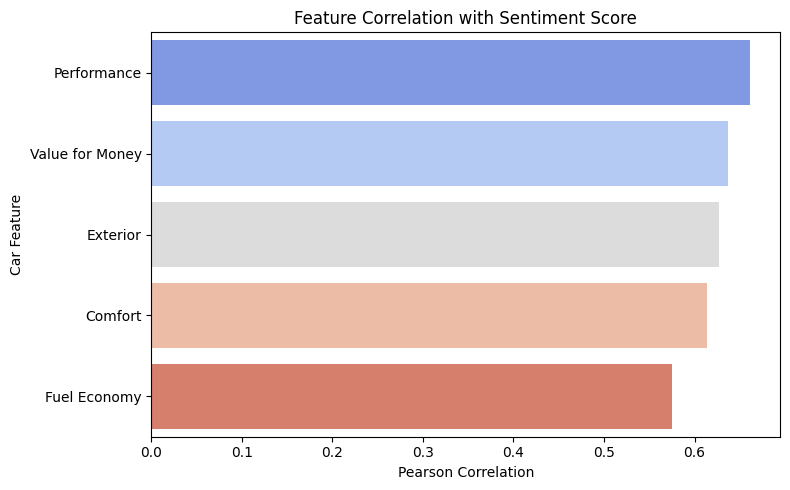

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df_carwale["Sentiment Score"] = df_carwale["Review"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
correlations = df_carwale[["Exterior", "Comfort", "Performance", "Fuel Economy", "Value for Money", "Sentiment Score"]].corr()
sentiment_corr = correlations["Sentiment Score"].drop("Sentiment Score")
sentiment_corr = sentiment_corr.sort_values(ascending=False)
sentiment_corr

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_corr.values, y=sentiment_corr.index, hue=sentiment_corr.index, palette="coolwarm")
plt.title("Feature Correlation with Sentiment Score")
plt.xlabel("Pearson Correlation")
plt.ylabel("Car Feature")
plt.tight_layout()
plt.show()